# Demo: Standardizing Images in PyTorch

In [46]:
# In this demo,
# we'll see how we can perform image pre-processing
# operations using the PyTorch framework.

In [47]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# If you're going to be feeding in images to your ML model,
# you won't work with a single image.
# Unless it's for prediction, you'll be working with a dataset of images,
# and the dataset that I'm going to download here is the CIFAR-10 [saifar] dataset.
# This dataset is freely available at the cs.toronto.edu URL that you see here on screen.
# It consists of images. All of the images are 32 pixels by 32 pixels.
# They have labels, and they're images of a dog, cat, bird, ship, airplane, and so on (10 different classes).
# This is a great dataset to use to build and train your classifier.

# !wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -P datasets

# This is a tar and gzip file.
# I'm going to run the tar command to untar and unzip this file
# so that it's available on this VM here.
#!tar xf datasets/cifar-10-python.tar.gz -C datasets

In [49]:
# I've unzipped the contents of this file to the datasets
# folder that we had set up earlier.
# a new subfolder has been created
# there  called cifar-10-batches-py,
# and you can click through and you'll find the cifar-10
# images which have been split up into batches.

In [50]:
# Here is the Python code to read in the cifar-10 images from a single batch.
# This is a pickle file,
# so I'll use the pickle utility in Python to load in the contents of this file. rb means read + binary.
with open('datasets/cifar-10-batches-py/data_batch_1', 'rb') as input_file:
    # Pickle.load deserializes this file and saves the contents in the X variable.
    X = pickle.load(input_file, encoding='latin1')

In [51]:
# Now the X variable has this key called data,
# which contains the actual images,
# so I'm going to extract the images from the X variable.
# The X variable now holds the tensor containing our images.

X = X['data']

In [52]:
# Let's take a look at the shape of the image data that we've got.
# You can see that we have 10000 images.
# That is the first dimension.
# The second dimension is a 1D vector representation of the image, height multiplied by width multiplied by number of channels,
# That gives us 3072. 32 x 32 x 3 for color images.
X.shape # batch_size, height * width * num_channels

(10000, 3072)

In [53]:
# Let's reshape these images to represent them in a different format.
# Here we'll have the number of images in a batch first,
# that is -1, the number of channels in an image,
# and then height and width.

X = X.reshape((-1, 3, 32, 32))

# You have 10000 images, they are all 3-channel or color images,
# and each image is 32 pixels by 32 pixels.
X.shape

# Remember that different machine learning frameworks might
# expect images to be in different formats,
# so you should know how you can use the reshape command to
# get the images in the form that you want.

(10000, 3, 32, 32)

In [54]:
# If you want to change the representation of your image tensors,
# you want to move the dimensions around, you can use the transpose operation.
# Here we originally had batch_size, channels,
# height and width, and we've transposed it to be batch_size,
# height, width, and channels.
# Batch_size was at index 0. It continues to remain at that index.
# At index 1 we had number of channels in the image,
# and we moved that to the very end.

# from (batch_size, channels, height, width) into (batch_size, height, width, channels)
X = X.transpose(0, 2, 3, 1)

# The X tensor now contains number of images height, width, and then number of channels.
X.shape

(10000, 32, 32, 3)

In [55]:
# And here is how you can use the reshape operation on a
# tensor to go back to the original format where every image
# is in the form of a 1D vector.

X = X.reshape(-1, 3 * 32 * 32)

X.shape

(10000, 3072)

In [56]:
# Let's check the array for the image at index 6
print(X[6])

[164 206  84 ... 122 170  44]


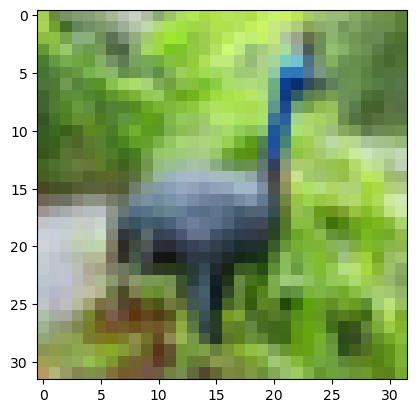

In [57]:
# Let's take a look at one of these images.
# I'm going to reshape the image at index position 6 so that it's height, width, number of channels, and display it using matplotlib.

plt.imshow(X[6].reshape(32, 32, 3))
plt.show()

# Here is an image of a bird.

In [58]:
type(X)

numpy.ndarray

In [59]:
# When you're working with neural networks,
# it's often useful to center your data, and this is true of images as well.
# You can subtract the mean value of all of the pixels 
X = X - X.mean(axis=0) # do it for all images, axis=0 means batch_dimension.
# and divide by the
# standard deviation so that your resulting images are all centered
# around 0 and expressed in terms z scores,
# or standard deviations.
X = X / np.std(X, axis=0) # do it for all images, axis=0 means batch_dimension. X is z-normalized now, every pixel is z-normalized separately.
# This will help the performance of the ML models that you build using these images.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


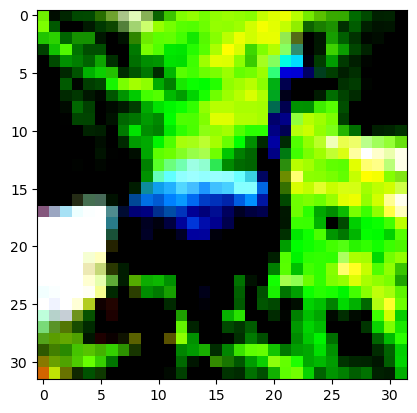

In [60]:
# Let's take a look at again on the image at index 6, after z_normalization.
# since as z_normalization we can have negative values, warning will be generated.
plt.imshow(X[6].reshape(32, 32, 3))
plt.show()

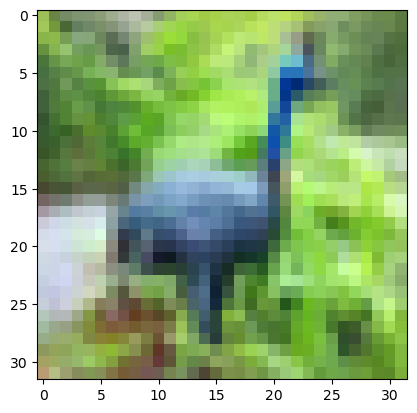

In [61]:
# I'm going to set up a little helper function called
# show here which takes in one image, reshapes it to be 32 x 32 x 3.
# I then find the minimum and maximum value of the pixel intensities,
# and scale all pixels to be within 0 and 1 using these min and max values.
def show(i):
    i = i.reshape((32, 32, 3))
    
    m, M = i.min(), i.max() # get min and mix for every pixel
    plt.imshow((i-m) / (M-m)) # standard min-max normalization which makes the values to be in the range of 0 and 1.
    plt.show()

    
# I'll now use this show function to display the image at index position 6.
# This is the same bird that we saw earlier,
# but remember, this image has been standardized.
show(X[6])

# Demo: ZCA Whitening to Decorrelate Features

In [66]:
# We've seen how to standardize batches of images, 
# the next operation I'm going to perform is called whitening, 
# which can be used to decorrelate features in our input images.
# Whitening is a computationally intense operation, 
# so I'm going to work with just a subset of images.
# I'll select the first thousand images, and we'll work with that. 
X_subset = X[:1000] # take the first 1000 images

X_subset.shape

(1000, 3072)

In [67]:
# The technique that we're about to perform is called ZCA whitening. 
# Whitening is the transformation of data in such a way that a 
# covariance matrix is the identity matrix, 
# and the effect of this mathematical transformation is to 
# decorrelate the features that exist in your images.